In [1]:
import matplotlib as mpl
mpl.rcParams['text.usetex'] = False
import matplotlib.pyplot as plt
from matplotlib import ticker
import matplotlib.colors as colors
import numpy as np 
from pathlib import Path
import numpy.linalg as npl
import os

import os
import sys
os.chdir('../')
from gen_geom import geom
msh = geom()
from gen_obs import obs 
obs = obs()
xv, yv = np.meshgrid(msh.x, msh.y, sparse=True, indexing="ij")

import pherosensor
from source_localization.control import Control
path_case = os.getcwd()
path_data = path_case + '/data'

In [2]:
colors_dic = {
    'no reg':                '#377eb8',   #'blue'   
    'reg pop dyn':           '#ff7f00',   #'orange'  
    'reg group LASSO':       '#f781bf',   #'pink'
    'reg T + group LASSO':   '#984ea3',   #'purple'    
    'all reg':               '#e41a1c',   #'red' 
} 

# Load and plot the optimal $S$ without regularization

In [3]:
path_output = path_case + '/output_noreg'
Linf_norm_mono_sensor_adjoint_states_no_reg = np.load(Path(path_output) / 'linf_norm_one_sensor_adjoint_states.npy')
no_reg = {
    "Linf norm mono sensor adjoint states" : Linf_norm_mono_sensor_adjoint_states_no_reg,
    "index sort" : np.argsort(Linf_norm_mono_sensor_adjoint_states_no_reg)[::-1],
    "ls": colors_dic['no reg'], 
    "label": "no reg"
}

# Load and plot the optimal $S$ with population dynamic regularization

In [4]:
path_output = path_case + '/output_regPD'
Linf_norm_mono_sensor_adjoint_states_reg_PD = np.load(Path(path_output) / 'linf_norm_one_sensor_adjoint_states.npy')
reg_PD = {
    "Linf norm mono sensor adjoint states" : Linf_norm_mono_sensor_adjoint_states_reg_PD,
    "index sort" : np.argsort(Linf_norm_mono_sensor_adjoint_states_reg_PD)[::-1],
    "ls": colors_dic['reg pop dyn'], 
    'label': 'PD'
}

# Load and plot the optimal $S$ with group LASSO regularization

In [5]:
path_output = path_case + '/output_reggroupLASSO'
Linf_norm_mono_sensor_adjoint_states_reggroupLASSO = np.load(Path(path_output) / 'linf_norm_one_sensor_adjoint_states.npy')
reg_groupLASSO = {
    "Linf norm mono sensor adjoint states" : Linf_norm_mono_sensor_adjoint_states_reggroupLASSO,
    "index sort" : np.argsort(Linf_norm_mono_sensor_adjoint_states_reggroupLASSO)[::-1],
    "ls": colors_dic['reg group LASSO'] ,
    'label': 'group LASSO'
}

# Load and plot the optimal $S$ with Tikhonov and group LASSO regularization

In [6]:
path_output = path_case + '/output_regTgroupLASSO'
Linf_norm_mono_sensor_adjoint_states_regTgroupLASSO = np.load(Path(path_output) / 'linf_norm_one_sensor_adjoint_states.npy')
reg_TgroupLASSO = {
    "Linf norm mono sensor adjoint states" : Linf_norm_mono_sensor_adjoint_states_regTgroupLASSO,
    "index sort" : np.argsort(Linf_norm_mono_sensor_adjoint_states_regTgroupLASSO)[::-1],
    "ls": colors_dic['reg T + group LASSO'], 
    'label': 'T+group LASSO'
}

# Load and plot the optimal $S$ with all regularizations

In [7]:
path_output = path_case + '/output_allreg'
Linf_norm_mono_sensor_adjoint_states_allreg = np.load(Path(path_output) / 'linf_norm_one_sensor_adjoint_states.npy')
all_reg = {
    "Linf norm mono sensor adjoint states" : Linf_norm_mono_sensor_adjoint_states_allreg,
    "index sort" : np.argsort(Linf_norm_mono_sensor_adjoint_states_allreg)[::-1],
    "ls": colors_dic['all reg'], 
    'label': 'all reg'
}

# Comparison of the errors

In [8]:
dic = {
        'no reg':no_reg, 
        'reg pop dyn':reg_PD,
        'reg group LASSO': reg_groupLASSO,
        'reg T group LASSO': reg_TgroupLASSO, 
        'all reg': all_reg,
    }

save_plot_path = 'TO BE DEFINED'

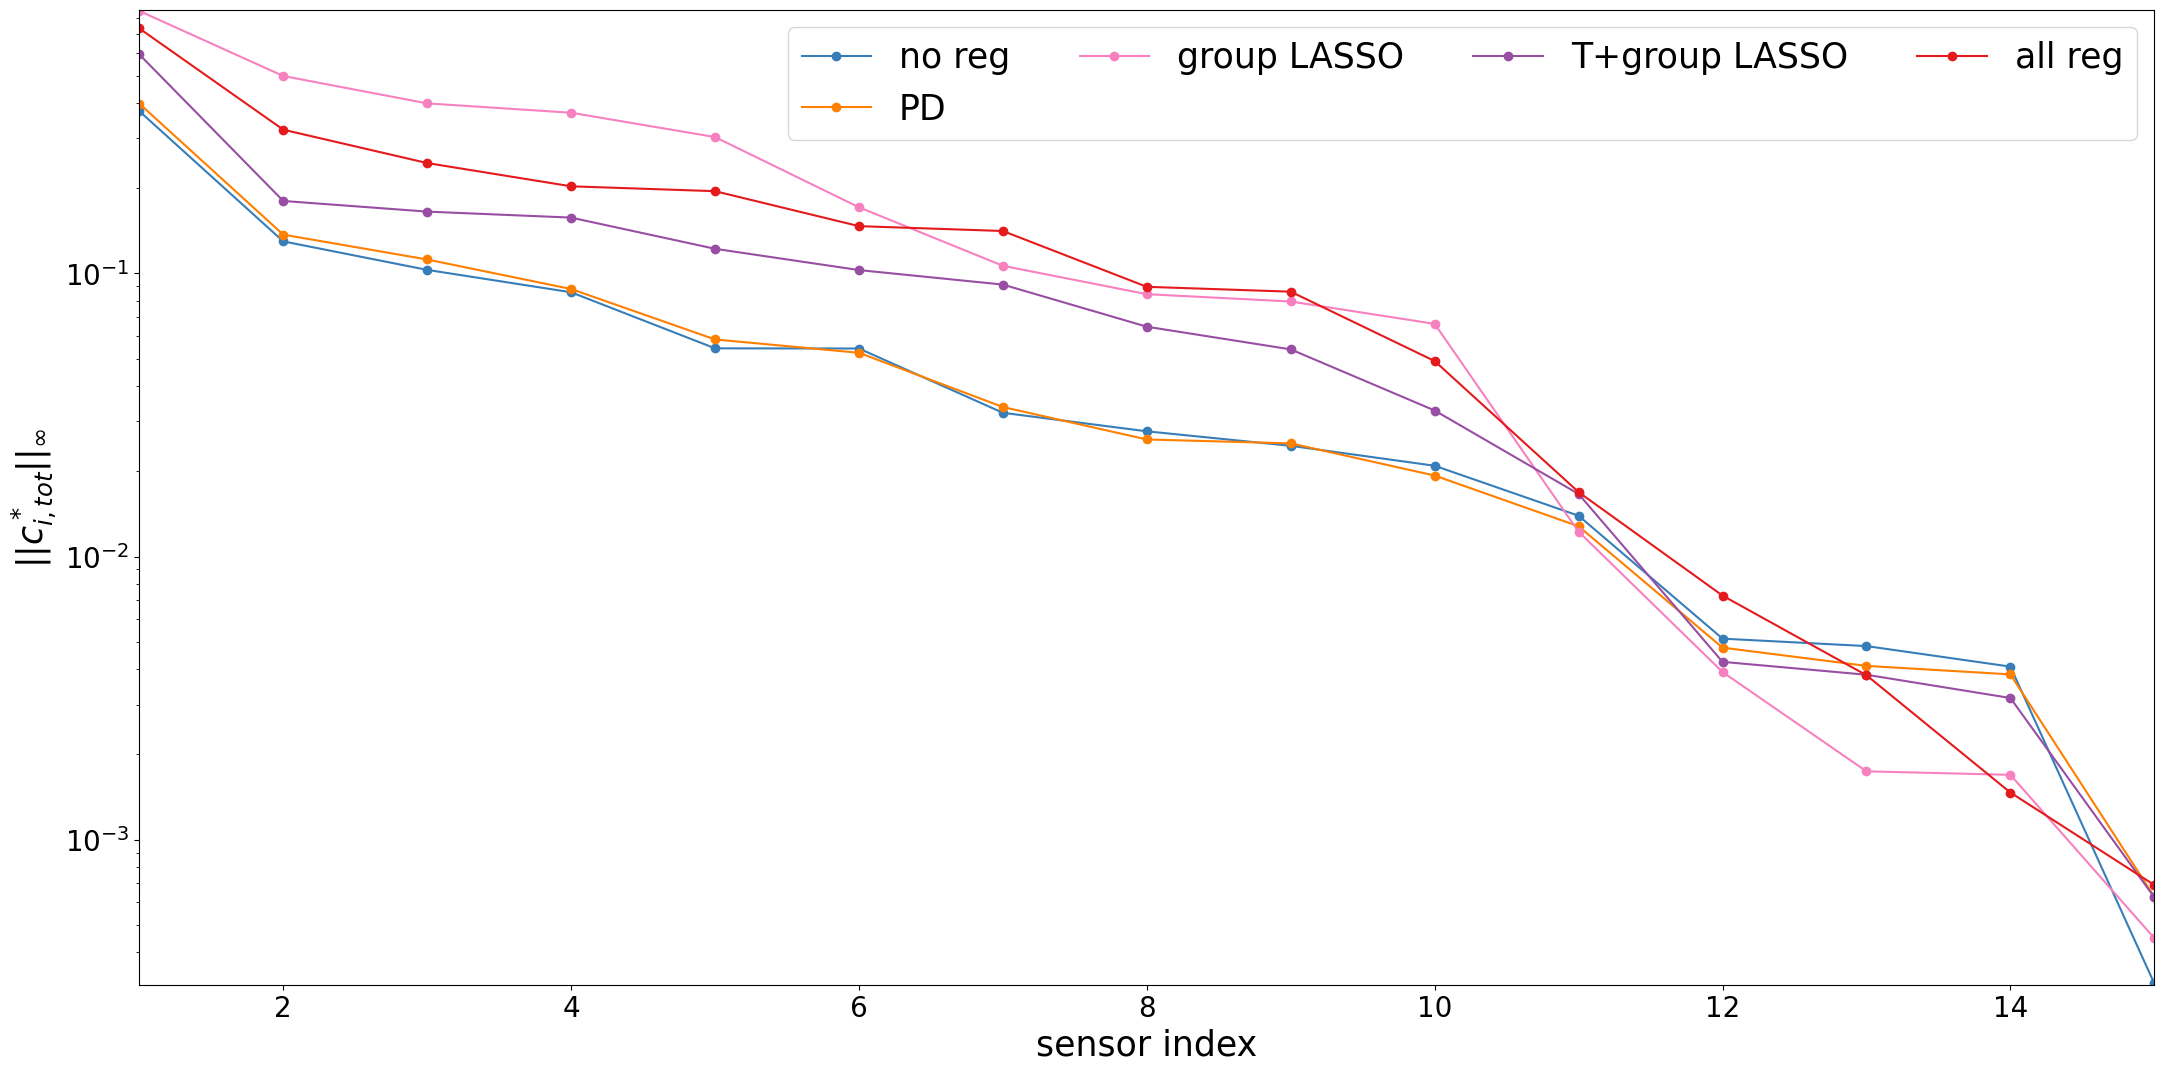

In [9]:
def plot_bump_chart(
    case_dict, 
    save_plot_path = None, 
    name_file = '', 
    file_format = 'pdf'

):
    n_case = len(case_dict.keys())
    ytick_labels = [case_dict[key]['label'] for key in case_dict.keys()]
    vmin = np.inf 
    vmax = -np.inf 
    fontsize = 25

    fig, ax_top = plt.subplots(1, 1, figsize=(26,15), sharey=True)
    for key in case_dict.keys():
        case = case_dict[key]
        linf_norm = case["Linf norm mono sensor adjoint states"][case["index sort"]]
        n_sensors = linf_norm.size
        ax_top.plot(np.arange(1,n_sensors+1), linf_norm, 'o-', color=case['ls'], label=case['label'])
        vmin = np.min((np.min(linf_norm),vmin))
        vmax = np.max((np.max(linf_norm),vmax))

    ax_top.set_yscale('log')
    ax_top.set_xlabel('sensor index', fontsize=fontsize)
    ax_top.set_ylabel('$\|\|c^*_{i,tot}\|\|_{\infty}$', fontsize=fontsize)
    ax_top.tick_params(labelsize=fontsize - 5)
    ax_top.set_ylim(0.99*vmin, 1.01*vmax)
    ax_top.set_xlim(1,n_sensors)
    ax_top.legend(fontsize=fontsize, ncol=4)
    
    plt.subplots_adjust(wspace=0, top=.76)
    if save_plot_path is None:
        plt.show()
    else: 
        plt.savefig(Path(save_plot_path) / f"{name_file}.{file_format}", format=file_format, bbox_inches="tight")

plot_bump_chart(
    dic, 
    #save_plot_path = save_plot_path, 
    #name_file = 'mono_sensor_total_contrib_inf_norm', 
    #file_format = 'png'
)